In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [5]:
# AlexNet
net = nn.Sequential(
    # 这里使用11 * 11的窗口来捕捉对象
    # stride为4，减少输出的高度和宽度
    # 另外，输出通道的数目远大于LeNet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    
    # 减少卷积窗口，使用填充为2来使得输入与输出的高和宽一致，增大输出通道数
    nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    
    # 使用三个连续的卷积层和较小的卷积窗口
    # 除了最后的卷积层，输出通道的数量进一步增加
    # 在前两个卷积层之后，汇聚层不用于减少输入的高度和宽度
    nn.Conv2d(256, 384, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # 这里全连接层的输出数量是lenet的好几倍，使用dropout来减轻过拟合
    nn.Linear(6400, 4096),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096),
    nn.ReLU(),
    nn.Dropout(p=0.5),
    # 输出层，由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
    nn.Linear(4096, 10),
)

In [6]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

In [7]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

loss 0.329, train acc 0.879, test acc 0.881
1318.1 examples/sec on cuda:0


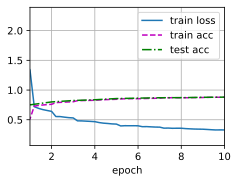

In [8]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

经典卷积神经网络的基本组成部分是下面的这个序列：

1. 带填充以保持分辨率的卷积层；

2. 非线性激活函数，如ReLU；

3. 汇聚层，如最大汇聚层。

In [15]:
def vgg_block(num_convs, in_channels, out_channels):
    """ vgg block """
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

In [16]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

In [21]:
def vgg(conv_arch):
    """ VGG Net """
    conv_blocks = []
    in_channels = 1
    # 卷积层部分
    for (num_convs, out_channels) in conv_arch:
        conv_blocks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels
        
    net = nn.Sequential(
        *conv_blocks,
        nn.Flatten(),
        # 全连接层部分
        nn.Linear(out_channels * 7 * 7, 4096),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(4096, 4096),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(4096, 10),
    )
    return net
    
vgg_net = vgg(conv_arch)

In [23]:
# 观察每个层的形状
X = torch.randn(size=(1, 1, 224, 224))
for block in vgg_net:
    X = block(X)
    print(block.__class__.__name__, "output shape: \t", X.shape)

Sequential output shape: 	 torch.Size([1, 64, 112, 112])
Sequential output shape: 	 torch.Size([1, 128, 56, 56])
Sequential output shape: 	 torch.Size([1, 256, 28, 28])
Sequential output shape: 	 torch.Size([1, 512, 14, 14])
Sequential output shape: 	 torch.Size([1, 512, 7, 7])
Flatten output shape: 	 torch.Size([1, 25088])
Linear output shape: 	 torch.Size([1, 4096])
ReLU output shape: 	 torch.Size([1, 4096])
Dropout output shape: 	 torch.Size([1, 4096])
Linear output shape: 	 torch.Size([1, 4096])
ReLU output shape: 	 torch.Size([1, 4096])
Dropout output shape: 	 torch.Size([1, 4096])
Linear output shape: 	 torch.Size([1, 10])


In [24]:
# vgg_net 过大， 这里构建一个通道数较少的网络
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

In [28]:
# 观察每个层的形状
X = torch.randn(size=(1, 1, 224, 224))
for block in net:
    X = block(X)
    print(block.__class__.__name__, "output shape: \t", X.shape)

Sequential output shape: 	 torch.Size([1, 16, 112, 112])
Sequential output shape: 	 torch.Size([1, 32, 56, 56])
Sequential output shape: 	 torch.Size([1, 64, 28, 28])
Sequential output shape: 	 torch.Size([1, 128, 14, 14])
Sequential output shape: 	 torch.Size([1, 128, 7, 7])
Flatten output shape: 	 torch.Size([1, 6272])
Linear output shape: 	 torch.Size([1, 4096])
ReLU output shape: 	 torch.Size([1, 4096])
Dropout output shape: 	 torch.Size([1, 4096])
Linear output shape: 	 torch.Size([1, 4096])
ReLU output shape: 	 torch.Size([1, 4096])
Dropout output shape: 	 torch.Size([1, 4096])
Linear output shape: 	 torch.Size([1, 10])


loss 0.179, train acc 0.934, test acc 0.922
1035.4 examples/sec on cuda:0


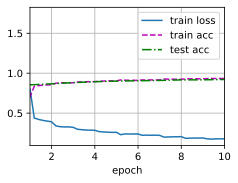

In [29]:
lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

NIN
N * C * H * W
NiN的想法是在每个像素位置（针对每个高度和宽度）应用一个全连接层。 如果我们将权重连接到每个空间位置，我们可以将其视为1 * 1卷积层（如 6.4节中所述），或作为在每个像素位置上独立作用的全连接层。 从另一个角度看，即将空间维度中的每个像素视为单个样本，将通道维度视为不同特征（feature）。

In [31]:
def nin_block(in_channesl, out_channels, kernel_size, strides, padding):
    block = nn.Sequential(
        nn.Conv2d(in_channesl, out_channels, kernel_size, strides, padding),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), 
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), 
        nn.ReLU(),
    )
    return block

In [33]:
net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    # 标签类别是10
    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    # 将四维的输出转成二维的输出，其形状为（batch_size, 10）
    nn.Flatten(),
)

In [34]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


loss 0.829, train acc 0.670, test acc 0.636
1227.4 examples/sec on cuda:0


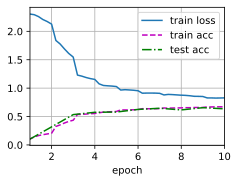

In [35]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

NiN使用由一个卷积层和多个卷积层组成的块。该块可以在卷积神经网络中使用，以允许更多的每像素非线性。

NiN去除了容易造成过拟合的全连接层，将它们替换为全局平均汇聚层（即在所有位置上进行求和）。该汇聚层通道数量为所需的输出数量（例如，Fashion-MNIST的输出为10）。

移除全连接层可减少过拟合，同时显著减少NiN的参数。

NiN的设计影响了许多后续卷积神经网络的设计。